In [1]:
import numpy as np
import torch
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch import nn
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt
%matplotlib inline

def data_tf(x):
    x=np.array(x,dtype='float32')/255
    x=(x-0.5)/0.5
    x=x.reshape((-1,))
    x=torch.from_numpy(x)
    return x

train_set=MNIST('./data',train=True,transform=data_tf,download=True)
test_set=MNIST('./data',train=False,transform=data_tf,download=True)

criterion=nn.CrossEntropyLoss()

In [2]:
def sgd_update(parameters,lr):
    for param in parameters:
        param.data=param.data -lr*param.grad.data

In [14]:
train_data=DataLoader(train_set,batch_size=1,shuffle=True)

net=nn.Sequential(
    nn.Linear(784,200),
    nn.ReLU(),
    nn.Linear(200,10),
)

losses1 = []
idx =0
start=time.time()
for e in range(5):
    train_loss=0
    for im,label in train_data:
        im=Variable(im)
        label=Variable(label)
        out=net(im)
        loss=criterion(out,label)
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(),1e-2)
        train_loss+=loss.data
        if idx %30 ==0:
            losses1.append(loss.data)
        idx+=1
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end=time.time()
print('使用时间：{:.5f}s'.format(end-start))

epoch: 0, Train Loss: 0.350656
epoch: 1, Train Loss: 0.210979
epoch: 2, Train Loss: 0.180042
epoch: 3, Train Loss: 0.158646
epoch: 4, Train Loss: 0.145056
使用时间：600.98778s


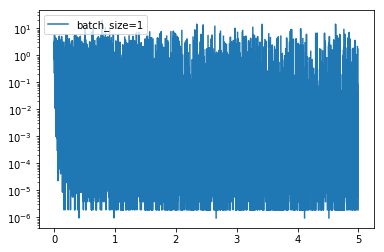

In [16]:
x_axis=np.linspace(0,5,len(losses1),endpoint=True)
plt.semilogy(x_axis,losses1,label='batch_size=1')
plt.legend(loc='best')

In [17]:
train_data=DataLoader(train_set,batch_size=64,shuffle=True)

net=nn.Sequential(
    nn.Linear(784,200),
    nn.ReLU(),
    nn.Linear(200,10),
)

losses1 = []
idx =0
start=time.time()
for e in range(5):
    train_loss=0
    for im,label in train_data:
        im=Variable(im)
        label=Variable(label)
        out=net(im)
        loss=criterion(out,label)
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(),1e-2)
        train_loss+=loss.data
        if idx %30 ==0:
            losses1.append(loss.data)
        idx+=1
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end=time.time()
print('使用时间：{:.5f}s'.format(end-start))

epoch: 0, Train Loss: 0.741646
epoch: 1, Train Loss: 0.363558
epoch: 2, Train Loss: 0.317021
epoch: 3, Train Loss: 0.289062
epoch: 4, Train Loss: 0.266892
使用时间：43.16595s


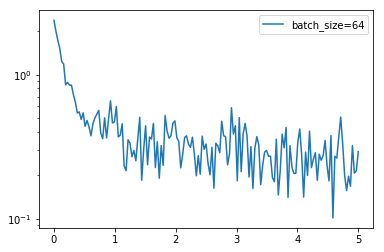

In [20]:
x_axis = np.linspace(0, 5, len(losses1), endpoint=True)
plt.semilogy(x_axis, losses1, label='batch_size=64')
plt.legend(loc='best')

In [22]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
# 使用 Sequential 定义 3 层神经网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

# 开始训练
losses3 = []
idx = 0
start = time.time() # 记时开始
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(), 1) # 使用 1.0 的学习率
        # 记录误差
        train_loss += loss.data
        if idx % 30 == 0:
            losses3.append(loss.data)
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))

epoch: 0, Train Loss: 2.591299
epoch: 1, Train Loss: 2.307450
epoch: 2, Train Loss: 2.305146
epoch: 3, Train Loss: 2.305063
epoch: 4, Train Loss: 2.304930
使用时间: 43.18743 s


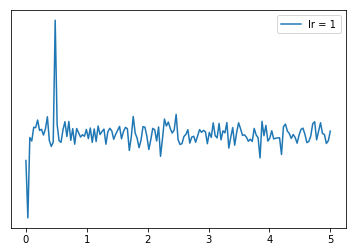

In [23]:
x_axis = np.linspace(0, 5, len(losses3), endpoint=True)
plt.semilogy(x_axis, losses3, label='lr = 1')
plt.legend(loc='best')

In [24]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
# 使用 Sequential 定义 3 层神经网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

optimzier = torch.optim.SGD(net.parameters(), 1e-2)
# 开始训练

start = time.time() # 记时开始
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        optimzier.zero_grad()
        loss.backward()
        optimzier.step()
        # 记录误差
        train_loss += loss.data
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))

epoch: 0, Train Loss: 0.751231
epoch: 1, Train Loss: 0.367765
epoch: 2, Train Loss: 0.322085
epoch: 3, Train Loss: 0.294437
epoch: 4, Train Loss: 0.273549
使用时间: 42.80107 s
